# **GenoVarDis@IberLEF2024: Automatic Genomic Variants and Related Diseases using Named Entity Recognition with Large Language Models**

## Autor: Víctor Manuel Oliveros Villena


In [ ]:
# Esta es la ruta a la raíz de nuestro Drive.
# Si se prefiere otra ruta, añadir los directorios pertinentes a continuación de esta.
path_drive = '/content/drive/MyDrive'

### **Configuración del entorno**

In [ ]:
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### **Lectura de los archivos**

In [ ]:
# Ruta al archivo TSV en Google Drive
test_tsv_path = path_drive + '/GenoVarDis/EvaluationTSV/annotation_GPT3.5Turbo.tsv'
test_text_path = path_drive + '/GenoVarDis/Data/test_text.tsv'
test_annotation_path = path_drive + '/GenoVarDis/Data/test_annotation.tsv'

# Leer el archivo TSV utilizando pandas
test_tsv = pd.read_csv(test_tsv_path, sep='\t')
test_text = pd.read_csv(test_text_path, sep='\t')
test_annotation = pd.read_csv(test_annotation_path, sep='\t')

# Eliminación de la columna mark, pues nos es irrelevante
test_annotation = test_annotation.drop('mark', axis=1)

# Combinación de los dataframes basándonos en las columnas relevantes
merged_test = pd.merge(test_tsv, test_annotation, on=['pmid', 'filename', 'offset1', 'offset2', 'span'], suffixes=('_pred', '_true'))
# Filtrado del DataFrame para incluir solo las filas donde label_pred y label_true coincidan
matching_test = merged_test[merged_test['label_pred'] == merged_test['label_true']]

### **Representación gráfica de los resultados de GPT-3.5**

### *Desglose de los resultados*

In [ ]:
# Extrae las etiquetas predichas y las verdaderas
y_pred = merged_test['label_pred']
y_true = merged_test['label_true']

len_merged = len(merged_test)
len_pred = len(test_tsv)
len_matching = len(matching_test)
false_pos = len_pred - len_merged

# print(len(y_pred), len(y_true))
print(f"Predicciones realizadas: {len_pred}")
print(f"Falsos positivos: {false_pos} ({(false_pos * 100 / len_pred):.2f}%)")
print(f"Entidades detectadas correctamente: {len_merged}")
print(f"Entidades detectadas y clasificadas correctamente: {len_matching} ({(len_matching * 100 / len_pred):.2f}% de las predicciones)\n")

Predicciones realizadas: 1028
Falsos positivos: 575 (55.93%)
Entidades detectadas correctamente: 453
Entidades detectadas y clasificadas correctamente: 393 (38.23% de las predicciones)



### *Gráficas de frecuencias*

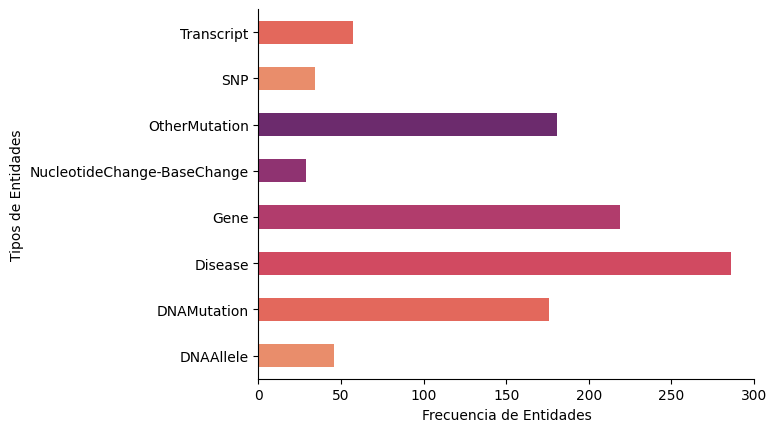

In [ ]:
# Frecuencia de cada tipo de entidad detectada
test_tsv.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('flare'))
plt.xlabel('Frecuencia de Entidades')
plt.ylabel('Tipos de Entidades')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Conteo de frecuencia concreta por cada tipo de entidad detectada
frecuencia_labels = test_tsv['label'].value_counts()
print(frecuencia_labels)

label
Disease                        286
Gene                           219
OtherMutation                  181
DNAMutation                    176
Transcript                      57
DNAAllele                       46
SNP                             34
NucleotideChange-BaseChange     29
Name: count, dtype: int64


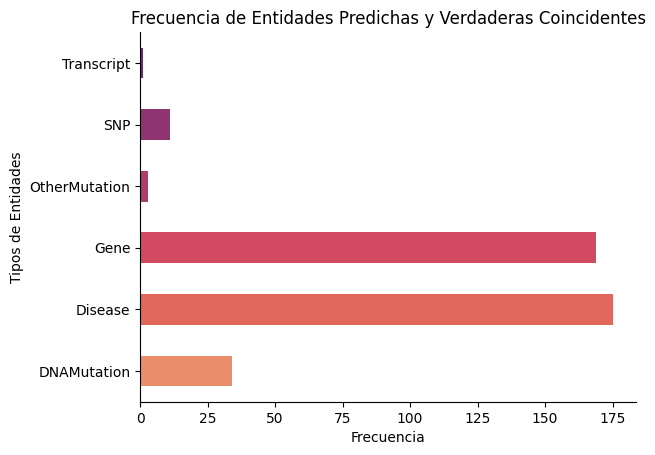

In [ ]:
# Grafica de las frecuencias de las etiquetas coincidentes
matching_test.groupby('label_pred').size().plot(kind='barh', color=sns.palettes.mpl_palette('flare'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Frecuencia')
plt.ylabel('Tipos de Entidades')
plt.title('Frecuencia de Entidades Predichas y Verdaderas Coincidentes')
plt.show()

In [ ]:
# Frecuencias concretas de las etiquetas predichas correctamente
frecuencia_labels = matching_test['label_pred'].value_counts()
print(frecuencia_labels)

label_pred
Disease          175
Gene             169
DNAMutation       34
SNP               11
OtherMutation      3
Transcript         1
Name: count, dtype: int64


### *Matriz de confusión de los resultados*

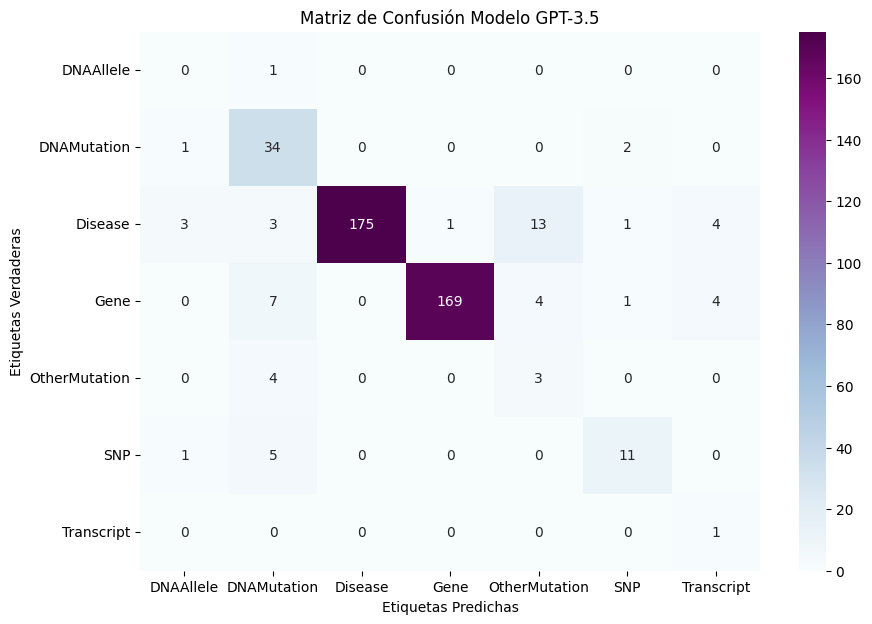

In [ ]:
# Genera la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión Modelo GPT-3.5')
plt.show()

### *Gráficas de distribución*

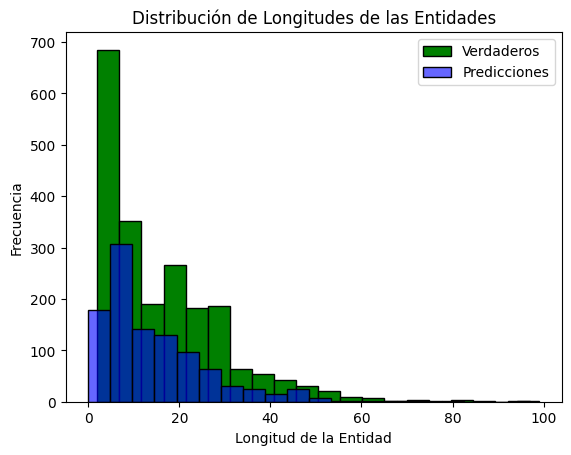

In [ ]:
# Histograma de las longitudes de las entidades verdaderas
sns.histplot(test_annotation['offset2'] - test_annotation['offset1'], bins=20, color='green', alpha=1, label='Verdaderos')
# Histograma de las longitudes de las entidades predichas
sns.histplot(test_tsv['offset2'] - test_tsv['offset1'], bins=20, color='blue', alpha=0.6, label='Predicciones')
plt.xlabel('Longitud de la Entidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitudes de las Entidades')
plt.legend()
plt.show()
